Based on posts @ [Towards Data Science](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810) and [Wikipedia](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

# KL Divergence: Python Example

We can think of the [Kullback–Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (KL) divergence (also called relative entropy) as distance metric (although it isn’t symmetric) that quantifies the difference between two probability distributions.

-  In contrast to [variation of information](https://en.wikipedia.org/wiki/Variation_of_information), it is a distribution-wise *asymmetric* measure and thus does not qualify as a statistical metric of spread - it also does not satisfy the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality).
    - Asymmetry: $D_{\text{KL}}(P \parallel Q) \neq D_{\text{KL}}(Q \parallel P)$.
- In the simple case, a Kullback–Leibler divergence of $0$ indicates that the two distributions in question are identical.

One common scenario where this is useful is when we are working with a complex distribution.
- Rather than working with the distribution directly, we can make our life easier by using another distribution with well known properties (i.e. normal distribution) that does a decent job of describing the data.
- In other words, we can use the KL divergence to tell whether a poisson distribution or a normal distribution is a better at approximating the data.

The KL divergence is also a key component of [Gaussian Mixture Models](https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e) and [t-SNE](https://towardsdatascience.com/t-sne-python-example-1ded9953f26).

***

For distributions $P$ and $Q$ of a <u>continuous random variable</u>, the Kullback-Leibler divergence is computed as an integral:

$$
D_\text{KL}(P \parallel Q) = \displaystyle\int_{-\infty}^{\infty} p(x) \log \bigg( \displaystyle\frac{p(x)}{q(x)} \bigg) dx
$$

On the other hand, if $P$ and $Q$ represent the probability distribution of a <u>discrete random variable</u>, the Kullback-Leibler divergence is calculated as a summation:

$$
D_\text{KL}(P \parallel Q) = \displaystyle\sum_{x \in \chi} p_i(x) \log \bigg( \displaystyle\frac{p_i(x)}{q_i(x)} \bigg) = -\sum_{x \in \chi} p_i(x) \log \bigg( \displaystyle\frac{q_i(x)}{p_i(x)} \bigg)
$$

The logarithms in these formulae are taken to base $2$, if information is measured in units of [bits](https://en.wikipedia.org/wiki/Bit), or to base $\displaystyle e$, if information is measured in [nats](https://en.wikipedia.org/wiki/Nat_(unit)).
- Most formulas involving the Kullback–Leibler divergence hold regardless of the base of the logarithm.

Various conventions exist for referring to $D_{\text{KL}}(P\parallel Q)$ in words. 
- Often it is referred to as the divergence between $P$ and $Q$, but this fails to convey the fundamental asymmetry in the relation.
- Sometimes it may be found described as the divergence of $P$ *from* $Q$.
    - This reflects the asymmetry in Bayesian inference, which starts from a *prior* $Q$ and updates to the *posterior* $P$.
- Another common way to refer to $D_{\text{KL}}(P\parallel Q)$ is as the relative entropy of $P$ with respect to $Q$.

### Example

Let $P$ and $Q$ be the distributions shown in the table and figure.
- $P \sim \text{Binom}\big(N = 2, p = 0.4\big)$
- $Q \sim \mathcal{U} \{0,2\}$

<img src="./IMG/Kullback–Leibler_distributions.png" width=400>

|   x  |   0   |   1   |   2   |
|:----:|:-----:|:-----:|:-----:|
| P(x) |  0.36 |  0.64 |  0.16 |
| Q(x) | 0.333 | 0.333 | 0.333 |

The KL divergences $D_{\text{KL}}(P\parallel Q)$ and $D_{\text{KL}}(Q\parallel P)$ are calculated as follows.
- This example uses the natural log with base $\displaystyle e$ to get results in nats.

$$
\begin{align}
D_{\text{KL}}(P \parallel Q) & = \displaystyle\sum_{x \in \chi} p(x) \ln \bigg(\frac{p(x)}{q(x)}\bigg) \\
& = 0.36 \cdot \ln \bigg(\frac{0.36}{0.333}\bigg) + 0.48 \cdot \ln \bigg(\frac{0.48}{0.333}\bigg) + 0.16 \cdot \ln \bigg(\frac{0.16}{0.333}\bigg) \\
& = 0.0852996
\end{align}
$$

$$
\begin{align}
D_{\text{KL}}(Q \parallel P) & = \displaystyle\sum_{x \in \chi} q(x) \ln \bigg(\frac{q(x)}{p(x)}\bigg) \\
& = 0.333 \cdot \ln \bigg(\frac{0.333}{0.36}\bigg) + 0.333 \cdot \ln \bigg(\frac{0.333}{0.48}\bigg) + 0.333 \cdot \ln \bigg(\frac{0.333}{0.16}\bigg) \\
& = 0.097455
\end{align}
$$

### Python Code


In [19]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
sns.set()

Next, we define a function to calculate the KL divergence of two probability distributions.
- We need to make sure that we don’t include any probabilities equal to 0 because the log of 0 is negative infinity.

In [20]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

The KL divergence between a normal distribution with a mean of $0$ and a standard deviation of $2$ and another distribution with a mean of $2$ and a standard deviation of $2$ is equal to $500$.

In [21]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

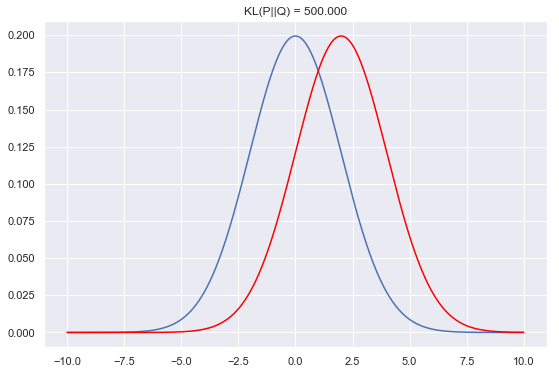

In [22]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_title('KL(P||Q) = %1.3f' % kl_divergence(p, q))

ax.plot(x, p)
ax.plot(x, q, c='red')

plt.show()

If we measure the KL divergence between the initial probability distribution and another distribution with a mean of $5$ and a standard deviation of $4$, we expect the KL divergence to be higher than in the previous example.

In [23]:
q2 = norm.pdf(x, 5, 4)

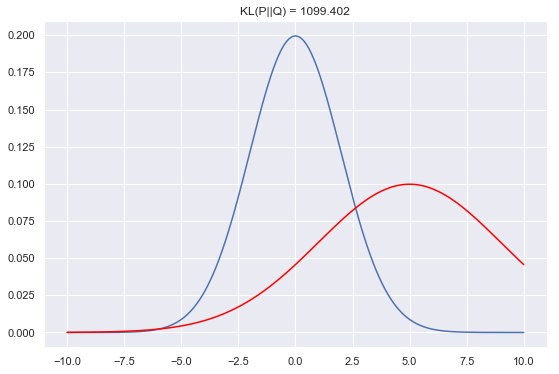

In [24]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_title('KL(P||Q) = %1.3f' % kl_divergence(p, q2))

ax.plot(x, p)
ax.plot(x, q2, c='red')

plt.show()

It’s important to note that the KL divergence is not symmetrical. 
- In other words, if we switch $P$ for $Q$ and vice versa, we get a different result.

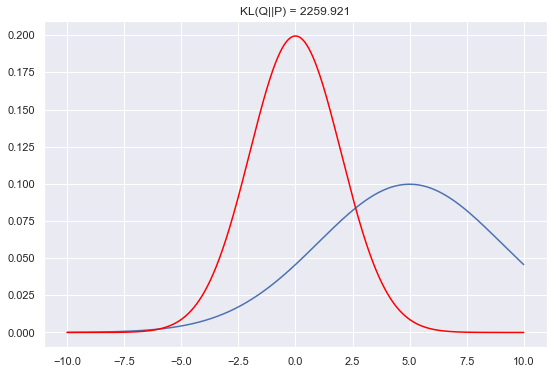

In [25]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_title('KL(Q||P) = %1.3f' % kl_divergence(q2, p))

ax.plot(x, q2)
ax.plot(x, p, c='red')

plt.show()

The <u>lower</u> the KL divergence, the <u>closer</u> the two distributions are to one another.
- Therefore, as in the case of t-SNE and Gaussian Mixture Models, we can estimate the Gaussian parameters of one distribution by minimizing its KL divergence with respect to another.

### `scipy` implementation

In [26]:
from scipy.stats import entropy

In [27]:
kl_divergence_scipy = lambda p, q: entropy(pk=p, qk=q)

In [29]:
print('Manually-implemented KL divergence: ', kl_divergence(p/p.sum(), q/q.sum()))
print('scipy-implemented KL divergence...: ', kl_divergence_scipy(p,q))

Manually-implemented KL divergence:  0.49996887082217045
scipy-implemented KL divergence...:  0.49996887082217045


### Minimizing KL Divergence

To begin, we create a probability distribution with a known mean ($0$) and variance ($2$).

Then, we create another distribution with random parameters.

In [10]:
x = np.arange(-10, 10, 0.001)
# Known distribution
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)

In [11]:
np.random.seed(0)

In [16]:
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
# Random distribution
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

Given that we are using gradient descent, we need to select values for the hyperparameters (i.e. step size, number of iterations).

In [17]:
learning_rate = 0.001
epochs = 100

Just like `numpy`, in `tensorflow` we need to allocate memory for variables.
- For the variable $q$, we use the equation for a normal distribution given $\mu$ and $\sigma$, only we exclude the part before the exponent since we're normalizing the result.

$$
y = \displaystyle\frac{1}{\sqrt{2\pi\sigma^2}} \exp\bigg\{ -\frac{(x-\mu)^2}{2\sigma^2} \bigg\}
$$

In [19]:
p = tf.placeholder(tf.float64, shape=p_pdf.shape)

mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))

q = normal / tf.reduce_sum(normal)

More info about the `tensorflow` functions:
- [`tf.placeholder`](https://databricks.com/tensorflow/placeholders)
- [`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable)
- [`tf.exp`](https://www.tensorflow.org/api_docs/python/tf/math/exp)
- [`tf.reduce_sum`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum)

Just like before, we define a function to compute the KL divergence that excludes probabilities equal to zero.

In [23]:
kl_divergence = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), p * tf.log(p / q))
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


- [`tf.where`](https://www.tensorflow.org/api_docs/python/tf/where)
- [`tf.zeros`](https://www.tensorflow.org/api_docs/python/tf/zeros)
- [`tf.float64`](https://www.tensorflow.org/api_docs/python/tf#float64)
- [`tf.log`](https://www.tensorflow.org/api_docs/python/tf/math/log)


Next, we initialize an instance of the `GradientDescentOptimizer` class and call the `minimize` method with the KL divergence function as an argument.

- [`tf.train.GradientDescentOptimizer`](https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/GradientDescentOptimizer)

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence)

Only after running `tf.global_variables_initializer()` will the variables hold the values we set when we declared them (i.e. `tf.zeros`).
- [`tf.global_variables_initializer`](https://www.tensorflow.org/api_docs/python/tf/compat/v1/global_variables_initializer)

In [25]:
init = tf.global_variables_initializer()

All operations in `tensorflow` must be done within a session. 
- In the proceeding code block, we minimize the KL divergence using gradient descent.

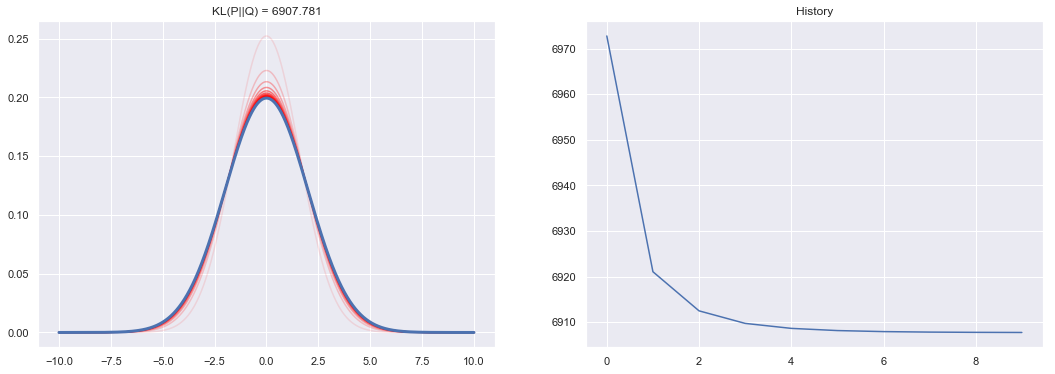

In [33]:
with tf.Session() as sess:
    sess.run(init)
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        sess.run(optimizer, { p: p_pdf })
        
        if i % 10 == 0:
            history.append(sess.run(kl_divergence, { p: p_pdf }))
            means.append(sess.run(mu)[0])
            variances.append(sess.run(sigma)[0][0])
    
    fig, ax = plt.subplots(ncols=2, figsize=(18,6))

    for ind, (mean, variance) in enumerate(zip(means, variances)):
        q_pdf = norm.pdf(x, mean, np.sqrt(variance))
        ax[0].plot(x, q_pdf.reshape(-1, 1), c='red', alpha=(ind+1)/10)
    
    ax[0].set_title('KL(P||Q) = %1.3f' % history[-1])
    ax[0].plot(x, p_pdf.reshape(-1, 1), linewidth=3)
    
    ax[1].set_title('History')
    ax[1].plot(history)
    
    plt.show()
    
    sess.close()